## Problem
Bir ML Projesine yatırım yapılmıştır. Ürettiği tahminler neticesinde oluşan gelir  
ile eski sistemin oluşturduğu gelir karşılaştırılıp anlamlı bir fark olup olmadığı test edilmek isteniyor.  

### Detaylar
* Model geliştirilmiş ve Web Sitesine entegre edilmiştir.
* Site kullanıcıları belirli bir kurala göre ikiye bölünmüştür.
* A grubu eski, B grubu ise yeni sistem
* Gelir konusunda anlamlı bir iş yapılıp yapılmadığı test edilmek isteniyor.


H0: M1=M2  
H1: M1!=M2

In [51]:
import pandas as pd
import numpy as np 
import seaborn as sns
from scipy import stats

In [52]:
# Verinin 1. Hali

A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
                    25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
                    32,33,33,33,31,32,33,26,32,33,29])
                    
A_B = pd.concat( [A, B], axis = 1) # sütunlara göre birleştirme işlemi yap
A_B.columns = ["A", "B"]  # sütunlara A ve B ismini ver

A_B.head()


,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [53]:
# Verinin 2. Hali


A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
                25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
                32,33,33,33,31,32,33,26,32,33,29])

# A ve A'nın grubu

GRUP_A = np.arange(len(A))
GRUP_A = pd.DataFrame(GRUP_A)
GRUP_A[:] = "A"
A = pd.concat([A, GRUP_A], axis = 1)

# B ve B'nin Grubu

GRUP_B = np.arange(len(B))
GRUP_B = pd.DataFrame(GRUP_A)
GRUP_B[:] = "B"
B = pd.concat([B, GRUP_B], axis = 1)

# Tüm Veri

AB = pd.concat([A,B])
AB.columns = ["Gelir", "Grup"]
print(AB.head())
print(AB.tail())

   Gelir Grup
0     30    A
1     27    A
2     21    A
3     27    A
4     29    A
    Gelir Grup
25     33    B
26     26    B
27     32    B
28     33    B
29     29    B


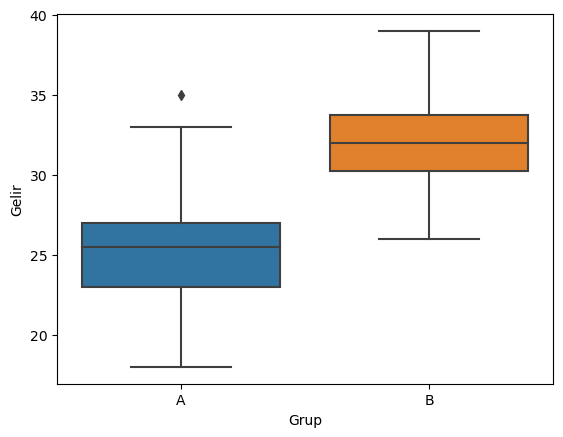

In [54]:
sns.boxplot(x = "Grup", y= "Gelir", data= AB);

Grafikte B'nin daha yukarıda olduğu görülmektedir  
Fakat bunun şans eseri ortaya çıkma durumu incelenmelidir  
Bu yüzden gerekli testleri gerçekleştireceğiz.

In [55]:
# Normallik Varsayımı Kontrolü (shapiro)


from scipy.stats import shapiro

shapiro(A_B.A)

ShapiroResult(statistic=0.9789243936538696, pvalue=0.7962851524353027)

In [56]:
shapiro(A_B.B)

ShapiroResult(statistic=0.9561262130737305, pvalue=0.24584470689296722)

Shapiro Grup A sonucundan yola çıkacak olursak  
H0 Hiptezi, örnek dağılımı ile ana kitle normal dağılımı arasında istatistiksel olarak anlamlı bir fark yoktur demektedir.  
Bu yüzden uygunluk testi reddedilememiştir.  
Grup B içinde normallik varsayımı sağlanmaktadır.


In [57]:
#Varyans Homojenliği Varsayımı

# H0: Varyanslar homojendir
# H1: Varyanslar homojen değildir.

from scipy.stats import levene

levene(A_B.A , A_B.B)

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

H0 Hipotezi reddedilemedi, varyanslar homojendir

In [58]:
# Hipotez Testi 

stats.ttest_ind(A_B["A"], A_B["B"], equal_var = True)

Ttest_indResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09)

In [59]:
Test_Istatistik, pValue = stats.ttest_ind(A_B["A"], A_B["B"], equal_var= True)
'Test_İstatistiği = %.4f, pValue = %.4f' % (Test_Istatistik,pValue) 

'Test_İstatistiği = -7.0287, pValue = 0.0000'

H0: M1=M2  
H1: M1!=M2

Hipotez Testimizi gerçekleştirdiğimizde H0 Reddedilmiştir.  
Yeni geliştirilen ML Modeli ile eski ML modeli arasında anlamlı bir farklılık vardır.  
Bu farklılık B lehinedir.


## Noneparametric Bağımsız İki Örneklem Testi
Şu an gerçekleştirdiğimiz test ise  
Yukarıda gerçekleştirilen iki Varsayım Testinin(normallik ve varyans homj.) başarısız olduğunu  
Bu durumda noneparametric kullanılarak devam ettiğimizin varsayımıdır.

In [60]:
stats.mannwhitneyu(A_B["A"], A_B["B"])

MannwhitneyuResult(statistic=89.5, pvalue=9.557950378612535e-08)

In [63]:
Test_Istatistik, pValue = stats.mannwhitneyu(A_B["A"], A_B["B"])
'Test_İstatistiği = %.4f, pValue = %.4f' % (Test_Istatistik,pValue) 

'Test_İstatistiği = 89.5000, pValue = 0.0000'

H0: M1=M2  
H1: M1!=M2  

pValue < 0.05 olduğundan dolayı H0 Hipotezi Reddedilmiştir.

M1 ve M2 arasında istatiksel olarak anlamlı bir fark vardır.